# 1 Import libraries

In [1]:
#importing Libraries
import numpy as np
import pandas as pd
from matplotlib.pylab import plt
import seaborn as sns
# from sqlalchemy import create_engine
# import sqlalchemy as 
import sqlite3

from wordcloud import WordCloud


# Comments on the document

In [2]:
######## 
# This is Elisa's Code from 2023-05-31

# loaded dataset (subset of original dataset and pre-processed)
# df = pd.read_pickle("df_modeling.pkl")



#######################################################

# 2 MAJOR ANALYSIS CHAPTERS IN THIS NOTEBOOK

################


# 1: Classification Models on Numeric Variables of Data
# for numeric analysis used dataset:
# create df_num


#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian

# KNN (needs standardisation --> scale dataset before fitting)
# SVM (needs standardisation --> scale dataset before fitting)
# Logistic Regression (needs standardisation --> scale dataset before fitting)


### Results
# LightGBM accuracy score : 0.6993709952383752
# Naive Bayes Bernoulli accuracy score : 0.7734995003233202
# Naive Bayes Multinomial accuracy score : 0.3325495267767915
# Naive Bayes Complement accuracy score : 0.3272000470283934
# Naive Bayes Gaussian accuracy score : 0.43007465757451063

# KNN accuracy score : 0.927341132208571
# SVM accuracy score : 0.8691434953853389
# Logistic Regression accuracy score : 0.9448592087472811

################


# 2: Classification on Text Variables of our Data
# for text analysis:
# retrieve 2 columns title and content

# before fitting: vectorize with TF-IDF Vectorizer


#### Models:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian --> not working due to memory error

# KNN --> takes 2 hours; only ran once, not again
# SVM --> takes 3,5 hours; only ran once, not again
# Logistic Regression


### Results
# LightGBM vect accuracy score : 0.5588148844865087
# Naive Bayes Bernoulli vect accuracy score : 0.549820704250191
# Naive Bayes Multinomial vect accuracy score : 0.5930280406795603
# Naive Bayes Complement vect accuracy score : 0.6222444300746576

# Logistic Regression vect accuracy score : 0.724589971195109




# LOADING PREPROCESSED DATASET df_modeling.okl

In [8]:
# retrieve dataset
df = pd.read_pickle("df_modeling.pkl")

In [10]:
df.head(5)

,id,source,title,content,url,published_utc,label,factuality,questionable-source,conspiracy-pseudoscience,...,Russia,USA,United Kingdom,Unknown,tokenized_content,tok_content_length,tokenized_title,tok_title_length,nb_character_content,nb_character_title
0,21stcenturywire--2022-04-26--An Unsettling Rea...,21stcenturywire,An Unsettling Realization: ‘Mask Zealots are S...,It’s been noted how the fanatical nature of ma...,https://21stcenturywire.com/2022/04/26/an-unse...,1650983484,1.0,2.0,0.0,1.0,...,0,1,0,0,"[It, ’, s, been, noted, how, the, fanatical, n...",128,"[An, Unsettling, Realization, :, ‘, Mask, Zeal...",11,720,61
1,21stcenturywire--2022-04-24--Episode #416 – ‘S...,21stcenturywire,Episode #416 – ‘Soldiers of Fortune’ with gues...,Episode #416 of SUNDAY WIRE SHOW resumes this ...,https://21stcenturywire.com/2022/04/24/episode...,1650823248,1.0,2.0,0.0,1.0,...,0,1,0,0,"[Episode, #, 416, of, SUNDAY, WIRE, SHOW, resu...",221,"[Episode, #, 416, –, ‘, Soldiers, of, Fortune,...",14,1143,66
2,21stcenturywire--2022-07-15--UKC News: UK Thou...,21stcenturywire,"UKC News: UK Thought Police, France Stops Vacc...",Authoritarians in the UK government are gettin...,https://21stcenturywire.com/2022/07/15/ukc-new...,1657916785,1.0,2.0,0.0,1.0,...,0,1,0,0,"[Authoritarians, in, the, UK, government, are,...",251,"[UKC, News, :, UK, Thought, Police, ,, France,...",16,1340,82
3,21stcenturywire--2022-05-22--Twitter Audit Fin...,21stcenturywire,Twitter Audit Finds Half of President Biden’s ...,"After the 2020 election, many Americans began ...",https://21stcenturywire.com/2022/05/22/twitter...,1653236268,1.0,2.0,0.0,1.0,...,0,1,0,0,"[After, the, 2020, election, ,, many, American...",630,"[Twitter, Audit, Finds, Half, of, President, B...",13,3274,69
4,21stcenturywire--2022-03-11--UKC News: The Tru...,21stcenturywire,UKC News: The Truth About US Bio Labs + White ...,The high stakes game surrounding the Ukraine c...,https://21stcenturywire.com/2022/03/11/ukc-new...,1647044296,1.0,2.0,0.0,1.0,...,0,1,0,0,"[The, high, stakes, game, surrounding, the, Uk...",167,"[UKC, News, :, The, Truth, About, US, Bio, Lab...",15,908,70


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   label                     85051 non-null  float64
 7   factuality                85051 non-null  float64
 8   questionable-source       85051 non-null  float64
 9   conspiracy-pseudoscience  85051 non-null  float64
 10  pro-science               85051 non-null  float64
 11  year                      85051 non-null  int64  
 12  month                     85051 non-null  int64  
 13  dayofyear                 85051 non-null  int64  
 14  dayof

# CREATE NUMERIC DATASETS df_num

# x_train, x_test, y_train, y_test (lower case x and y)


In [13]:
df_num = df.select_dtypes(exclude=['object'])
print(df_num)


        published_utc  label  factuality  questionable-source  \
0          1650983484    1.0         2.0                  0.0   
1          1650823248    1.0         2.0                  0.0   
2          1657916785    1.0         2.0                  0.0   
3          1653236268    1.0         2.0                  0.0   
4          1647044296    1.0         2.0                  0.0   
...               ...    ...         ...                  ...   
106705     1665142200    1.0         1.0                  0.0   
106706     1660253100    1.0         1.0                  0.0   
106707     1655742000    1.0         1.0                  0.0   
106708     1642390200    1.0         1.0                  0.0   
106709     1664605800    1.0         1.0                  0.0   

        conspiracy-pseudoscience  pro-science  year  month  dayofyear  \
0                            1.0          0.0  2022      4        116   
1                            1.0          0.0  2022      4        114   


In [14]:
# STEP 1: DEFINE X and Y
x = df_num.drop(["label"], axis = 1)
y = df["label"]


In [15]:
x.head(3)

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,year,month,dayofyear,dayofthemonth,weekday,...,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown,tok_content_length,tok_title_length,nb_character_content,nb_character_title
0,1650983484,2.0,0.0,1.0,0.0,2022,4,116,26,1,...,0,0,0,1,0,0,128,11,720,61
1,1650823248,2.0,0.0,1.0,0.0,2022,4,114,24,6,...,0,0,0,1,0,0,221,14,1143,66
2,1657916785,2.0,0.0,1.0,0.0,2022,7,196,15,4,...,0,0,0,1,0,0,251,16,1340,82


In [16]:
x.dtypes

published_utc                 int64
factuality                  float64
questionable-source         float64
conspiracy-pseudoscience    float64
pro-science                 float64
year                          int64
month                         int64
dayofyear                     int64
dayofthemonth                 int64
weekday                       int64
weekend                       int32
word_count_content            int64
word_count_title              int64
Australia                     uint8
Bulgaria                      uint8
Canada                        uint8
Cyprus                        uint8
France                        uint8
Germany                       uint8
Ireland                       uint8
Israel                        uint8
Japan                         uint8
Kenya                         uint8
Macedonia                     uint8
Netherlands                   uint8
Qatar                         uint8
Russia                        uint8
USA                         

In [17]:
y.head(3)

0    1.0
1    1.0
2    1.0
Name: label, dtype: float64

In [18]:
# STEP 2: Split the dataset:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)


# CREATE LightGBM MODEL

In [19]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [20]:
# Create a LightGBM dataset for training
LightGMB_train_data = lgb.Dataset(x_train, label=y_train)


In [21]:
# Set the hyperparameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [22]:
# Train the LightGBM model
clf_LightGBM = lgb.train(params, LightGMB_train_data, num_boost_round=100)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003711 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.


In [47]:
# Make predictions on the test set
y_pred_LightGBM = clf_LightGBM.predict(x_test)
y_pred_LightGBM = [round(pred) for pred in y_pred_LightGBM]  # Convert probability to binary predictions


In [48]:
# get confusion matrix
pd.crosstab(y_test, y_pred_LightGBM, rownames=["real"], colnames=["predict"])


predict,0,1
real,,
0.0,6646,709
1.0,0,5251
2.0,128,4277


In [49]:
# Evaluate the model
accuracy_LightGBM = accuracy_score(y_test, y_pred_LightGBM)
print("Accuracy:", accuracy_LightGBM)

# 0.699


Accuracy: 0.6993709952383752


In [50]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM classification report:\n", classification_report (y_test, y_pred_LightGBM))

# great for real news and ok for fake news but horrible for mixed news

LightGBM classification report:
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94      7355
         1.0       0.51      1.00      0.68      5251
         2.0       0.00      0.00      0.00      4405

    accuracy                           0.70     17011
   macro avg       0.50      0.63      0.54     17011
weighted avg       0.58      0.70      0.62     17011



C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_LightGBM = confusion_matrix(y_test, y_pred_LightGBM)

print("Confusion Matrix:\n",  conf_matrix_LightGBM)


Confusion Matrix:
 [[6646  709    0]
 [   0 5251    0]
 [ 128 4277    0]]


# Create Naive Bayes Bernoulli Model

In [27]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [28]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern = BernoulliNB()


In [40]:
# Train the classifier
clf_Bern.fit(x_train, y_train)


BernoulliNB()

In [41]:
# Evaluate the model
accuracyNB_Bernoulli = accuracy_score(y_test, y_pred_Bern)
print("Accuracy:", accuracyNB_Bernoulli)

# 0.773


Accuracy: 0.7734995003233202


In [42]:
# get confusion matrix
y_pred_Bern = clf_Bern.predict(x_test)
pd.crosstab(y_test, y_pred_Bern, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,5752,121,1482
1.0,0,5251,0
2.0,2247,3,2155


In [44]:
# Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli classification report:\n", classification_report (y_test, y_pred_Bern))

# this one looks already ok

Naive Bayes Bernoulli classification report:
               precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      7355
         1.0       0.98      1.00      0.99      5251
         2.0       0.59      0.49      0.54      4405

    accuracy                           0.77     17011
   macro avg       0.76      0.76      0.76     17011
weighted avg       0.77      0.77      0.77     17011



In [45]:
# Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern = confusion_matrix(y_test, y_pred_Bern)

print("Confusion Matrix:\n",  conf_matrix_Bern)


Confusion Matrix:
 [[5752  121 1482]
 [   0 5251    0]
 [2247    3 2155]]


# Create Naive Bayes Multinomial

In [52]:
from sklearn.naive_bayes import MultinomialNB
clf_mult = MultinomialNB()


In [53]:
clf_mult.fit(x_train, y_train)


MultinomialNB()

In [54]:
# get accuracy
accuracyNB_Multinomial = clf_mult.score(x_test, y_test)
accuracyNB_Multinomial

# 0.332


0.3325495267767915

In [55]:
# get confusion matrix
y_pred_NB_Multinomial = clf_mult.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Multinomial, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,427,4480,2448
1.0,210,3549,1492
2.0,229,2495,1681


In [56]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial classification report:\n ", classification_report (y_test, y_pred_NB_Multinomial))

# really bad overall

Naive Bayes Multinomial classification report:
                precision    recall  f1-score   support

         0.0       0.49      0.06      0.10      7355
         1.0       0.34      0.68      0.45      5251
         2.0       0.30      0.38      0.34      4405

    accuracy                           0.33     17011
   macro avg       0.38      0.37      0.30     17011
weighted avg       0.39      0.33      0.27     17011



In [57]:
# create confusion matrix
cf_matrix_Multinomial = confusion_matrix(y_test, y_pred_NB_Multinomial)
print(cf_matrix_Multinomial)


[[ 427 4480 2448]
 [ 210 3549 1492]
 [ 229 2495 1681]]


# Create Naive Bayes Complement

In [58]:
from sklearn.naive_bayes import ComplementNB
clf_compl = ComplementNB()


In [59]:
clf_compl.fit(x_train, y_train)


ComplementNB()

In [60]:
# get accuracy
accuracyNB_Complement = clf_compl.score(x_test, y_test)
accuracyNB_Complement

# 0.331


0.3272000470283934

In [61]:
# get confusion matrix
y_pred_NB_Complement = clf_compl.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Complement, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,77,4682,2596
1.0,7,3724,1520
2.0,11,2629,1765


In [62]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement classification report:\n ", classification_report (y_test, y_pred_NB_Complement))

# really bad overall

Naive Bayes Complement classification report:
                precision    recall  f1-score   support

         0.0       0.81      0.01      0.02      7355
         1.0       0.34      0.71      0.46      5251
         2.0       0.30      0.40      0.34      4405

    accuracy                           0.33     17011
   macro avg       0.48      0.37      0.27     17011
weighted avg       0.53      0.33      0.24     17011



In [63]:
# create confusion matrix
cf_matrix_Complement = confusion_matrix(y_test, y_pred_NB_Complement)
print(cf_matrix_Complement)


[[  77 4682 2596]
 [   7 3724 1520]
 [  11 2629 1765]]


# Create Naive Bayes Gaussian


In [64]:
from sklearn.naive_bayes import GaussianNB
clf_gau = GaussianNB()


In [65]:
clf_gau.fit(x_train, y_train)


GaussianNB()

In [66]:
# get accuracy
accuracyNB_Gaussian = clf_gau.score(x_test, y_test)
accuracyNB_Gaussian

# 0.43


0.43007465757451063

In [67]:
# get confusion matrix
y_pred_NB_Gaussian = clf_gau.predict(x_test)
pd.crosstab(y_test, y_pred_NB_Gaussian, rownames=["real"], colnames=["predict"])

# looks bad

predict,0.0,1.0,2.0
real,,,
0.0,7158,90,107
1.0,5098,62,91
2.0,4254,55,96


In [68]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Gaussian classification report:\n ", classification_report (y_test, y_pred_NB_Gaussian))

# really bad overall

Naive Bayes Gaussian classification report:
                precision    recall  f1-score   support

         0.0       0.43      0.97      0.60      7355
         1.0       0.30      0.01      0.02      5251
         2.0       0.33      0.02      0.04      4405

    accuracy                           0.43     17011
   macro avg       0.35      0.34      0.22     17011
weighted avg       0.36      0.43      0.28     17011



In [69]:
# create confusion matrix
cf_matrix_Gaussian = confusion_matrix(y_test, y_pred_NB_Gaussian)
print(cf_matrix_Gaussian)


[[7158   90  107]
 [5098   62   91]
 [4254   55   96]]


# CREATE SCALED DATASET

In [42]:
# KNN needs standardisation
# SVM needs standardisation
# Logistic Regression need standardisation


In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [73]:
cols = x_train.columns

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns=cols)
x_test_scaled = pd.DataFrame(scaler.transform(x_test), columns=cols)


In [74]:
x_train_scaled

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,year,month,dayofyear,dayofthemonth,weekday,...,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown,tok_content_length,tok_title_length,nb_character_content,nb_character_title
0,0.236385,1.330124,-0.500620,-0.356074,-0.03431,0.0,0.138142,0.238484,1.280930,-0.413892,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.597365,-0.638036,-0.603405,-0.790382
1,0.410721,1.330124,-0.500620,-0.356074,-0.03431,0.0,0.430322,0.410803,-0.203178,1.685848,...,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632,0.699313,0.399997,0.725830,0.136872
2,0.129979,-0.339294,-0.500620,-0.356074,-0.03431,0.0,0.138142,0.133177,0.025146,1.160913,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,0.911546,-0.015217,0.930491,0.431908
3,-0.689343,-1.174003,-0.500620,2.808407,-0.03431,0.0,-0.738400,-0.690127,0.595957,0.111043,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,0.314554,-0.430430,0.309880,-0.663938
4,-0.270465,-0.339294,-0.500620,-0.356074,-0.03431,0.0,-0.154039,-0.268902,-1.344800,1.160913,...,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632,-0.142775,0.399997,-0.166778,0.179020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68035,1.102156,0.495415,-0.500620,-0.356074,-0.03431,0.0,1.014684,1.100082,1.052606,-0.938827,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.831507,0.192390,-0.836963,-0.158163
68036,-0.289386,-1.174003,-0.500620,2.808407,-0.03431,0.0,-0.154039,-0.288048,-1.573124,0.111043,...,-0.00664,-0.101661,-0.263741,-1.345299,-0.502525,-0.138632,-0.330362,0.815210,-0.339891,0.937683
68037,0.016456,1.330124,-0.500620,-0.356074,-0.03431,0.0,0.138142,0.018298,-1.344800,-1.463761,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,2.417719,1.230423,2.263172,0.431908
68038,-0.207708,-0.339294,1.997523,-0.356074,-0.03431,0.0,-0.154039,-0.211462,-0.659827,0.635978,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,0.326877,0.607603,0.281514,0.136872


In [75]:
x_test_scaled

,published_utc,factuality,questionable-source,conspiracy-pseudoscience,pro-science,year,month,dayofyear,dayofthemonth,weekday,...,Netherlands,Qatar,Russia,USA,United Kingdom,Unknown,tok_content_length,tok_title_length,nb_character_content,nb_character_title
0,-1.318544,1.330124,-0.500620,-0.356074,-0.03431,0.0,-1.322762,-1.321966,-0.203178,-1.463761,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.517949,-0.845643,-0.528116,-0.748234
1,-0.041297,-0.339294,-0.500620,-0.356074,-0.03431,0.0,-0.154039,-0.039142,1.395092,-0.938827,...,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632,-0.231776,-0.015217,-0.328492,-0.031719
2,1.171116,-0.339294,-0.500620,-0.356074,-0.03431,0.0,1.306864,1.176668,-1.573124,-0.413892,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.203022,-1.468463,-0.193023,-1.928376
3,0.095633,0.495415,-0.500620,-0.356074,-0.03431,0.0,0.138142,0.094884,-0.431502,-0.938827,...,-0.00664,-0.101661,-0.263741,-1.345299,1.989951,-0.138632,0.773252,0.192390,0.640996,0.010429
4,-0.690574,1.330124,-0.500620,-0.356074,-0.03431,0.0,-0.738400,-0.690127,0.595957,0.111043,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.413886,1.022817,-0.429762,0.600500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17006,-1.090491,-0.339294,-0.500620,-0.356074,-0.03431,0.0,-1.030581,-1.092206,-0.659827,0.111043,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.213976,-0.222823,-0.180298,0.305464
17007,0.017167,-2.008711,1.997523,-0.356074,-0.03431,0.0,0.138142,0.018298,-1.344800,-1.463761,...,-0.00664,-0.101661,3.791605,-1.345299,-0.502525,-0.138632,-0.831507,-0.430430,-0.836963,-0.200311
17008,-1.319128,0.495415,-0.500620,-0.356074,-0.03431,0.0,-1.322762,-1.321966,-0.203178,-1.463761,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,0.897854,-0.430430,0.895497,-0.579642
17009,-0.842215,1.330124,-0.500620,-0.356074,-0.03431,0.0,-0.738400,-0.843300,-1.230638,-0.938827,...,-0.00664,-0.101661,-0.263741,0.743329,-0.502525,-0.138632,-0.712382,-0.845643,-0.717666,-0.579642


# CREATE KNN ON SCALED DATA


In [76]:
# STEP 3: Instantiate the model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 6)


In [77]:
# STEP 4: Fit the model

knn.fit(x_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=6)

In [78]:
# STEP 5: Predict
y_pred_knn = knn.predict(x_test_scaled)


In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score 

pd.crosstab(y_test, y_pred_knn, rownames = ['Reality'], colnames = ['Prediction'])

### looks ok

Prediction,0.0,1.0,2.0
Reality,,,
0.0,6682,1,672
1.0,8,5240,3
2.0,552,0,3853


In [80]:
# STEP 8: Evaluate model with score
# get accuracy
accuracy_knn = knn.score(x_test_scaled, y_test)
accuracy_knn

# WOW

# almost 100% accuracy for fake news!
# 0.927


0.927341132208571

In [81]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("KNN classification report:\n", classification_report (y_test, y_pred_knn))


KNN classification report:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92      7355
         1.0       1.00      1.00      1.00      5251
         2.0       0.85      0.87      0.86      4405

    accuracy                           0.93     17011
   macro avg       0.92      0.93      0.93     17011
weighted avg       0.93      0.93      0.93     17011



In [82]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)

print("Confusion Matrix:\n",  conf_matrix_knn)


Confusion Matrix:
 [[6682    1  672]
 [   8 5240    3]
 [ 552    0 3853]]


# CREATE SVM ON SCALED DATA
# takes 4 Minutes


In [ ]:
# SVM - needs standardization


In [83]:
# Step 3: Instantiate model 
from sklearn import svm
clf_SVM = svm.SVC(gamma=0.01, kernel="poly")


In [84]:
# Step 4: Fit the model on the training dataset
clf_SVM.fit(x_train_scaled, y_train)

# takes 4 minutes

SVC(gamma=0.01, kernel='poly')

In [85]:
# get accuracy
accuracy_SVM = clf_SVM.score(x_test_scaled, y_test)
accuracy_SVM

# nice!
# 0.869


0.8691434953853389

In [86]:
# get confusion matrix
y_pred_SVM = clf_SVM.predict(x_test_scaled)
pd.crosstab(y_test, y_pred_SVM, rownames=["real"], colnames=["predict"])

# looks really good
# almots perfect for fake news


predict,0.0,1.0,2.0
real,,,
0.0,6962,0,393
1.0,0,5242,9
2.0,1824,0,2581


In [87]:
from sklearn.metrics import classification_report 

# get classification report
print("SVM classification report:\n ", classification_report (y_test, y_pred_SVM))


SVM classification report:
                precision    recall  f1-score   support

         0.0       0.79      0.95      0.86      7355
         1.0       1.00      1.00      1.00      5251
         2.0       0.87      0.59      0.70      4405

    accuracy                           0.87     17011
   macro avg       0.89      0.84      0.85     17011
weighted avg       0.88      0.87      0.86     17011



In [88]:
# create confusion matrix
cf_matrix_SVM = confusion_matrix(y_test, y_pred_SVM)
print(cf_matrix_SVM)

# almost 100% accuracy for fake news!

[[6962    0  393]
 [   0 5242    9]
 [1824    0 2581]]


# CREATE LOGISTIC REGRESSION ON SCALED DATA

In [ ]:
# Logistic Regression - needs standardization


In [89]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg = LogisticRegression(C=1.0)


In [90]:
# Step 4: Fit the model on the training dataset
clf_LogReg.fit(x_train_scaled, y_train)


C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [91]:
# get accuracy
accuracy_logReg = clf_LogReg.score(x_test_scaled, y_test)
accuracy_logReg

# WOW!!!

# 0.944


0.9448592087472811

In [92]:
# get confusion matrix
y_pred_LogReg = clf_LogReg.predict(x_test_scaled)
pd.crosstab(y_test, y_pred_LogReg, rownames=["real"], colnames=["predict"])

# looks super good
# 100% correct prediction for fake news!!!


predict,0.0,1.0,2.0
real,,,
0.0,6456,0,899
1.0,0,5251,0
2.0,39,0,4366


In [93]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression classification report:\n ", classification_report (y_test, y_pred_LogReg))


Logistic Regression classification report:
                precision    recall  f1-score   support

         0.0       0.99      0.88      0.93      7355
         1.0       1.00      1.00      1.00      5251
         2.0       0.83      0.99      0.90      4405

    accuracy                           0.94     17011
   macro avg       0.94      0.96      0.95     17011
weighted avg       0.95      0.94      0.95     17011



In [94]:
# create confusion matrix
cf_matrix_LogReg = confusion_matrix(y_test, y_pred_LogReg)
print(cf_matrix_LogReg)

# 100% accuracy for fake news!


[[6456    0  899]
 [   0 5251    0]
 [  39    0 4366]]


# COMPARE MODELS ON NUMERIC DATA ONLY


In [95]:
print("LightGBM accuracy score :", accuracy_LightGBM)
print("Naive Bayes Bernoulli accuracy score :", accuracyNB_Bernoulli)
print("Naive Bayes Multinomial accuracy score :", accuracyNB_Multinomial)
print("Naive Bayes Complement accuracy score :", accuracyNB_Complement)
print("Naive Bayes Gaussian accuracy score :", accuracyNB_Gaussian)
print("KNN accuracy score :", accuracy_knn)
print("SVM accuracy score :", accuracy_SVM)
print("Logistic Regression accuracy score :", accuracy_logReg)

LightGBM accuracy score : 0.6993709952383752
Naive Bayes Bernoulli accuracy score : 0.7734995003233202
Naive Bayes Multinomial accuracy score : 0.3325495267767915
Naive Bayes Complement accuracy score : 0.3272000470283934
Naive Bayes Gaussian accuracy score : 0.43007465757451063
KNN accuracy score : 0.927341132208571
SVM accuracy score : 0.8691434953853389
Logistic Regression accuracy score : 0.9448592087472811


In [96]:
#Creating the Dictionary with model name as key adn accuracy as key-value
labels={'LightGBM accuracy score':accuracy_LightGBM,'Naive Bayes Bernoulli':accuracyNB_Bernoulli,
        'Naive Bayes Multinomial':accuracyNB_Multinomial,'Naive Bayes Complement':accuracyNB_Complement,
        'Naive Bayes Gaussian':accuracyNB_Gaussian,
        'KNN':accuracy_knn, 'SVM':accuracy_SVM, 'Logistic Regression':accuracy_logReg}


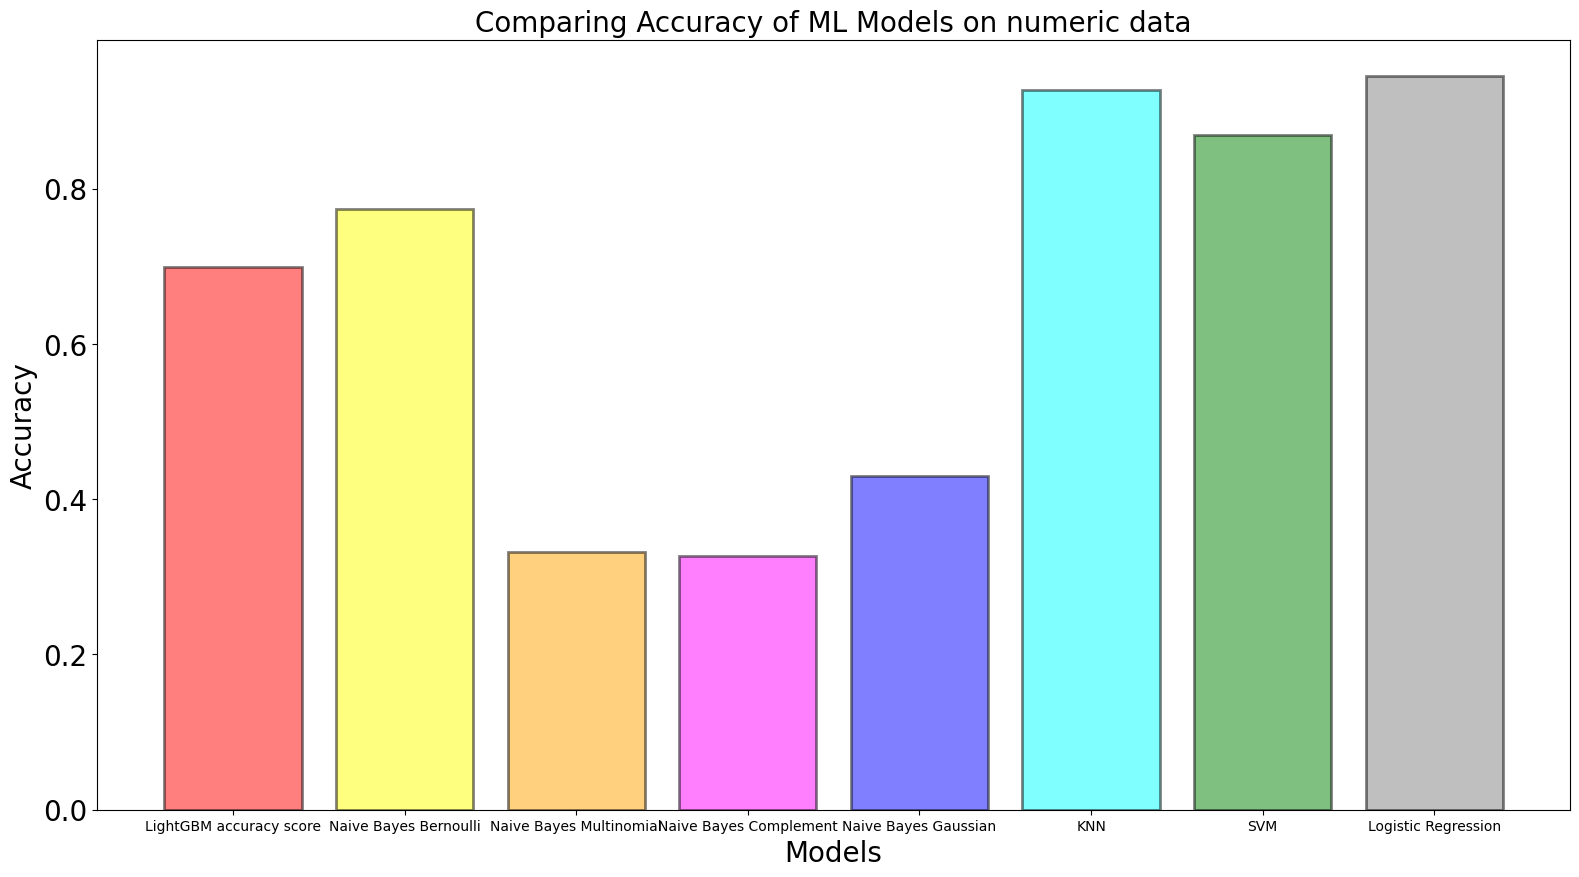

In [97]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(19,10))
plt.title('Comparing Accuracy of ML Models on numeric data',fontsize=20)
colors=['red','yellow','orange','magenta', 'blue', 'cyan', 'green', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



# Create ML Models on text data (TF-IDF VECTORIZING)


In [ ]:
# LightGBM
# Naive Bayes Bernoulli
# Naive Bayes Multinomial
# Naive Bayes Complement
# Naive Bayes Gaussian

# KNN --> takes super long
# SVM --> takes super long
# Logistic Regression


# Create X and Y (only title and text)
# X_train, X_test, Y_train, Y_test (uppercase letters)


In [98]:
# STEP 1: DEFINE X and Y
X = df_short.drop("label", axis=1)
Y = df_short["label"]


In [99]:
X.columns = X.columns.astype(str)

In [100]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85051 entries, 0 to 106709
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        85051 non-null  object 
 1   source                    85051 non-null  object 
 2   title                     85051 non-null  object 
 3   content                   85051 non-null  object 
 4   url                       85051 non-null  object 
 5   published_utc             85051 non-null  int64  
 6   factuality                85051 non-null  float64
 7   questionable-source       85051 non-null  float64
 8   conspiracy-pseudoscience  85051 non-null  float64
 9   pro-science               85051 non-null  float64
 10  year                      85051 non-null  int64  
 11  month                     85051 non-null  int64  
 12  dayofyear                 85051 non-null  int64  
 13  dayofthemonth             85051 non-null  int64  
 14  weekd

## Create Train / Test Datasets

In [101]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)


# Vectorizing

### TFIDF Vectorizing
### USING CONTENT AND TITLE ONLY


In [102]:
# VECTORIZING
# TAKES 1 MINUTE

from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack, csr_matrix

vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()

vectorizer1.fit(X_train['content'])
vectorizer2.fit(X_train['title'])


TfidfVectorizer()

In [103]:
# TAKES 1 MINUTE

X_train_content = vectorizer1.transform(X_train['content'])
X_train_title = vectorizer2.transform(X_train['title'])
X_test_content = vectorizer1.transform(X_test['content'])
X_test_title = vectorizer2.transform(X_test['title'])


In [104]:
X_train_text = hstack([X_train_content, X_train_title])
X_test_text = hstack([X_test_content, X_test_title])


In [105]:
X_train_text

<68040x269516 sparse matrix of type '<class 'numpy.float64'>'
	with 17382504 stored elements in Compressed Sparse Row format>

In [106]:
X_test_text

<17011x269516 sparse matrix of type '<class 'numpy.float64'>'
	with 4331019 stored elements in Compressed Sparse Row format>

# LightGBM Model

In [107]:
# Create a LightGBM dataset for training
LightGMB_train_data_text = lgb.Dataset(X_train_text, label=Y_train)

# Set the hyperparameters for the LightGBM model
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',  # Set the appropriate objective for your classification task
    'metric': 'binary_logloss',  # Set the appropriate metric for evaluation
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}


In [108]:
# Train the LightGBM model
clf_LightGBM_vect = lgb.train(params, LightGMB_train_data_text, num_boost_round=100)

# takes 3 minutes


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 14.234546 seconds.
You can set `force_col_wise=true` to remove the overhead.


In [109]:
# Make predictions on the test set
y_pred_LightGBM_vect = clf_LightGBM_vect.predict(X_test_text)
y_pred_LightGBM_vect = [round(pred) for pred in y_pred_LightGBM_vect]  # Convert probability to binary predictions


In [110]:
# Evaluate the model
accuracy_LightGBM_vect = accuracy_score(Y_test, y_pred_LightGBM_vect)
print("Accuracy LightGBM vect:", accuracy_LightGBM_vect)


Accuracy LightGBM vect: 0.5588148844865087


In [111]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_LightGBM_vect = confusion_matrix(Y_test, y_pred_LightGBM_vect)

print("Confusion Matrix:\n",  conf_matrix_LightGBM_vect)


Confusion Matrix:
 [[4863 2567    0]
 [ 633 4643    0]
 [ 889 3416    0]]


In [112]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("LightGBM vect classification report:\n", classification_report (Y_test, y_pred_LightGBM_vect))

# great for real news and ok for fake news but horrible for mixed news


LightGBM vect classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.65      0.70      7430
         1.0       0.44      0.88      0.58      5276
         2.0       0.00      0.00      0.00      4305

    accuracy                           0.56     17011
   macro avg       0.40      0.51      0.43     17011
weighted avg       0.47      0.56      0.49     17011



C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Naive Bayes Bernoulli Model

In [113]:
# Create a Bernoulli Naive Bayes classifier
clf_Bern_vect = BernoulliNB()


In [114]:
# Train the classifier
clf_Bern_vect.fit(X_train_text, Y_train)


BernoulliNB()

In [115]:
# Make predictions on the test set
y_pred_Bern_vect = clf_Bern_vect.predict(X_test_text)


In [116]:
# Evaluate the model
accuracyNB_Bernoulli_vect = accuracy_score(Y_test, y_pred_Bern_vect)
print("Accuracy:", accuracyNB_Bernoulli_vect)


Accuracy: 0.549820704250191


In [117]:
# STEP 7: Evaluate Model with confusion matrix 
from sklearn.metrics import confusion_matrix 

conf_matrix_Bern_vect = confusion_matrix(Y_test, y_pred_Bern_vect)

print("Confusion Matrix:\n",  conf_matrix_Bern_vect)


Confusion Matrix:
 [[3349 2393 1688]
 [ 740 3670  866]
 [1011  960 2334]]


In [118]:
# STEP 9: Evaluate model with classification report
from sklearn.metrics import classification_report 

print("Naive Bayes Bernoulli vect classification report:\n", classification_report (Y_test, y_pred_Bern_vect))


Naive Bayes Bernoulli vect classification report:
               precision    recall  f1-score   support

         0.0       0.66      0.45      0.53      7430
         1.0       0.52      0.70      0.60      5276
         2.0       0.48      0.54      0.51      4305

    accuracy                           0.55     17011
   macro avg       0.55      0.56      0.55     17011
weighted avg       0.57      0.55      0.55     17011



# MULTINOMIAL NAIVE BAYES


In [119]:
from sklearn.naive_bayes import MultinomialNB
clf_mult_vect = MultinomialNB()


In [120]:
# fit the model
clf_mult_vect.fit(X_train_text, Y_train)


MultinomialNB()

In [121]:
# get accuracy
accuracyNB_Multinomial_vect = clf_mult_vect.score(X_test_text, Y_test)
accuracyNB_Multinomial_vect


0.5930280406795603

In [122]:
# get confusion matrix
y_pred_NB_Multinomial_vect = clf_mult_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_NB_Multinomial_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,7089,139,202
1.0,3159,2054,63
2.0,3224,136,945


In [123]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Multinomial Vect classification report:\n ", classification_report (Y_test, y_pred_NB_Multinomial_vect))

Naive Bayes Multinomial Vect classification report:
                precision    recall  f1-score   support

         0.0       0.53      0.95      0.68      7430
         1.0       0.88      0.39      0.54      5276
         2.0       0.78      0.22      0.34      4305

    accuracy                           0.59     17011
   macro avg       0.73      0.52      0.52     17011
weighted avg       0.70      0.59      0.55     17011



In [124]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix


In [125]:
# create confusion matrix
cf_matrix_Multinomial_vect = confusion_matrix(Y_test, y_pred_NB_Multinomial_vect)
print(cf_matrix_Multinomial_vect)


[[7089  139  202]
 [3159 2054   63]
 [3224  136  945]]


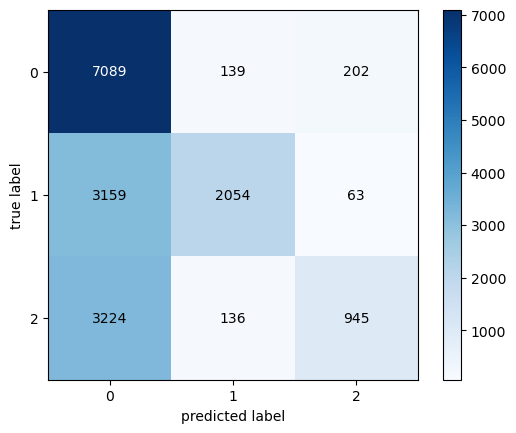

In [126]:
# absolute values
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Multinomial_vect,
                                colorbar=True)

plt.show()

<Axes: >

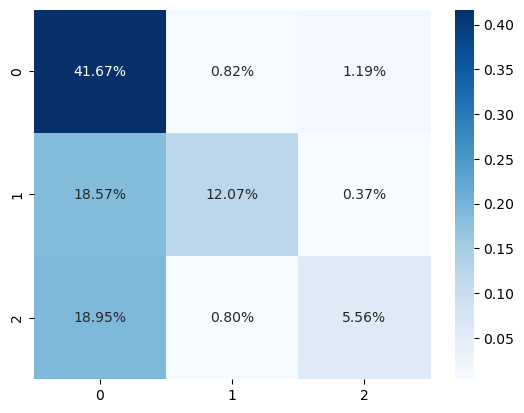

In [127]:
# percent
sns.heatmap(cf_matrix_Multinomial_vect/np.sum(cf_matrix_Multinomial_vect), annot=True, 
            fmt='.2%', cmap='Blues')

# COMPLEMENT NAIVE BAYES


In [128]:
from sklearn.naive_bayes import ComplementNB
clf_compl_vect = ComplementNB(alpha=0.0015)


In [129]:
# fit model
clf_compl_vect.fit(X_train_text, Y_train)


ComplementNB(alpha=0.0015)

In [130]:
# get accuracy
accuracyNB_Complement_vect = clf_compl_vect.score(X_test_text, Y_test)
accuracyNB_Complement_vect


0.6222444300746576

In [131]:
# get confusion matrix
y_pred_NB_Complement_vect = clf_compl_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_NB_Complement_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,4392,1500,1538
1.0,893,3773,610
2.0,1132,753,2420


In [132]:
from sklearn.metrics import classification_report 

# get classification report
print("Naive Bayes Complement vect classification report:\n ", classification_report (Y_test, y_pred_NB_Complement_vect))


Naive Bayes Complement vect classification report:
                precision    recall  f1-score   support

         0.0       0.68      0.59      0.63      7430
         1.0       0.63      0.72      0.67      5276
         2.0       0.53      0.56      0.55      4305

    accuracy                           0.62     17011
   macro avg       0.61      0.62      0.62     17011
weighted avg       0.63      0.62      0.62     17011



In [133]:
# create confusion matrix
cf_matrix_Complement_vect = confusion_matrix(Y_test, y_pred_NB_Complement_vect)
print(cf_matrix_Complement_vect)


[[4392 1500 1538]
 [ 893 3773  610]
 [1132  753 2420]]


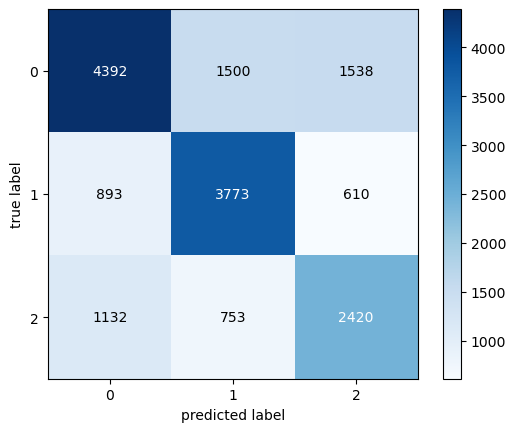

In [134]:
# absolute values
fig, ax = plot_confusion_matrix(conf_mat=cf_matrix_Complement_vect,
                                colorbar=True)

plt.show();


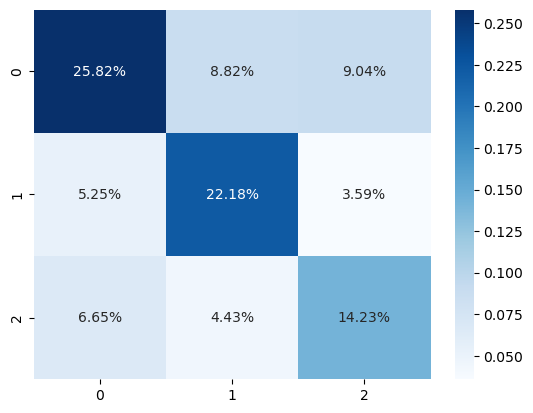

In [135]:
# percent
sns.heatmap(cf_matrix_Complement_vect/np.sum(cf_matrix_Complement_vect), annot=True, 
            fmt='.2%', cmap='Blues');


# Create NAIVE BAYES Gaussian
# not possible due to memory error


In [ ]:
# transform to avoid sparse matrix
# Convert sparse matrix to dense numpy array
# X_train_text_dense = X_train_text.toarray()


In [119]:
# from sklearn.naive_bayes import GaussianNB
# clf_gau_vect = GaussianNB()


In [ ]:
# clf_gau_vect.fit(X_train_text_dense, Y_train)


In [ ]:
# get accuracy
# accuracyNB_Gaussian_vect = clf_gau_vect.score(X_test_text, y_test)
# accuracyNB_Gaussian_vect


In [ ]:
# get confusion matrix
# y_pred_NB_Gaussian_vect = clf_gau_vect.predict(X_test_text)
# pd.crosstab(y_test, y_pred_NB_Gaussian_vect, rownames=["real"], colnames=["predict"])


In [ ]:
# from sklearn.metrics import classification_report 

# get classification report
# print("Naive Bayes Gaussian vect classification report:\n ", classification_report (y_test, y_pred_NB_Gaussian_vect))

# really bad overall


In [ ]:
# create confusion matrix
# cf_matrix_Gaussian_vect = confusion_matrix(y_test, y_pred_NB_Gaussian_vect)
# print(cf_matrix_Gaussian_vect)


# CREATE KNN ON TEXT DATA
# TAKES 2 hours!


In [ ]:
# STEP 3: Instantiate the model
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = 6)


In [ ]:
# STEP 4: Fit the model
# knn.fit(X_train_text_scaled, y_train)


In [ ]:
# STEP 5: Predict
# y_pred_knn_vect = knn.predict(X_test_text_scaled)


In [ ]:
# Evaluate
# from sklearn.metrics import accuracy_score, precision_score, recall_score 

# pd.crosstab(y_test, y_pred_knn_vect, rownames = ['Reality'], colnames = ['Prediction'])

### looks really bad!


In [ ]:
# STEP 8: Evaluate model with score
# get accuracy
# knn.score(X_test_text_scaled, y_test)


In [ ]:
# STEP 9: Evaluate model with classification report
# from sklearn.metrics import classification_report 

# print("KNN vect classification report:\n", classification_report (y_test, y_pred_knn_vect))

# quite bad overall...


# CREATE SVM MODEL ON TEXT DATA
# TAKES SUPER LONG


In [220]:
# Step 3: Instantiate model 
# from sklearn import svm
# clf_SVM_vect = svm.SVC(gamma=0.01, kernel="poly")


In [221]:
# Step 4: Fit the model on the training dataset
# clf_SVM_vect.fit(X_train_text, Y_train)

# takes 3,5 hours!!!


SVC(gamma=0.01, kernel='poly')

In [ ]:
# get accuracy
# SVM_vect_score = clf_SVM_vect.score(X_test_text, Y_test)

# takes 45 Minutes

# bad result


In [223]:
# get confusion matrix
# y_pred_SVM_vect = clf_SVM_vect.predict(X_test_text)
# pd.crosstab(Y_test, y_pred_SVM_vect, rownames=["real"], colnames=["predict"])

# dauert 40 Minuten

predict,0.0
real,
0.0,7399
1.0,5262
2.0,4350


In [224]:
# from sklearn.metrics import classification_report 

# get classification report
# print("SVM vect classification report:\n ", classification_report (Y_test, y_pred_SVM_vect))


SVM vect classification report:
                precision    recall  f1-score   support

         0.0       0.43      1.00      0.61      7399
         1.0       0.00      0.00      0.00      5262
         2.0       0.00      0.00      0.00      4350

    accuracy                           0.43     17011
   macro avg       0.14      0.33      0.20     17011
weighted avg       0.19      0.43      0.26     17011



C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [225]:
# create confusion matrix
# cf_matrix_SVM_vect = confusion_matrix(Y_test, y_pred_SVM_vect)
# print(cf_matrix_SVM_vect)


[[7399    0    0]
 [5262    0    0]
 [4350    0    0]]


# CREATE LOGISTIC REGRESION MODEL ON TEXT DATA


In [ ]:
# needs standardization


In [136]:
# Step 3: Instantiate model 
from sklearn.linear_model import LogisticRegression

clf_LogReg_vect = LogisticRegression(C=1.0)


In [137]:
# Step 4: Fit the model on the training dataset
clf_LogReg_vect.fit(X_train_text, Y_train)

# takes 1 minute

C:\Users\Nutzer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
# get accuracy
accuracy_logReg_vect = clf_LogReg_vect.score(X_test_text, Y_test)
accuracy_logReg_vect


0.724589971195109

In [139]:
# get confusion matrix
y_pred_LogReg_vect = clf_LogReg_vect.predict(X_test_text)
pd.crosstab(Y_test, y_pred_LogReg_vect, rownames=["real"], colnames=["predict"])


predict,0.0,1.0,2.0
real,,,
0.0,5829,774,827
1.0,903,4017,356
2.0,1336,489,2480


In [140]:
from sklearn.metrics import classification_report 

# get classification report
print("Logistic Regression vect classification report:\n ", classification_report (Y_test, y_pred_LogReg_vect))


Logistic Regression vect classification report:
                precision    recall  f1-score   support

         0.0       0.72      0.78      0.75      7430
         1.0       0.76      0.76      0.76      5276
         2.0       0.68      0.58      0.62      4305

    accuracy                           0.72     17011
   macro avg       0.72      0.71      0.71     17011
weighted avg       0.72      0.72      0.72     17011



In [141]:
# create confusion matrix
cf_matrix_LogReg_vect = confusion_matrix(Y_test, y_pred_LogReg_vect)
print(cf_matrix_LogReg_vect)


[[5829  774  827]
 [ 903 4017  356]
 [1336  489 2480]]


# COMPARE MODELS ON TEXT DATA ONLY

In [142]:
print("LightGBM vect accuracy score :", accuracy_LightGBM_vect)
print("Naive Bayes Bernoulli vect accuracy score :", accuracyNB_Bernoulli_vect)
print("Naive Bayes Multinomial vect accuracy score :", accuracyNB_Multinomial_vect)
print("Naive Bayes Complement vect accuracy score :", accuracyNB_Complement_vect)
# print("KNN vect accuracy score :", accuracy_knn_vect)
# print("SVM vect accuracy score :", accuracy_SVM_vect)
print("Logistic Regression vect accuracy score :", accuracy_logReg_vect)


LightGBM vect accuracy score : 0.5588148844865087
Naive Bayes Bernoulli vect accuracy score : 0.549820704250191
Naive Bayes Multinomial vect accuracy score : 0.5930280406795603
Naive Bayes Complement vect accuracy score : 0.6222444300746576
Logistic Regression vect accuracy score : 0.724589971195109


In [143]:
# 5 only (without KNN, without SVM)
#Creating the Dictionary with model name as key adn accuracy as key-value
labels_vect  = {'LightGBM vect':accuracy_LightGBM_vect,'Naive Bayes Bernoulli vect':accuracyNB_Bernoulli_vect,
        'Naive Bayes Multinomial vect':accuracyNB_Multinomial_vect,'Naive Bayes Complement vect':accuracyNB_Complement_vect,
        'Logistic Regression vect':accuracy_logReg_vect}


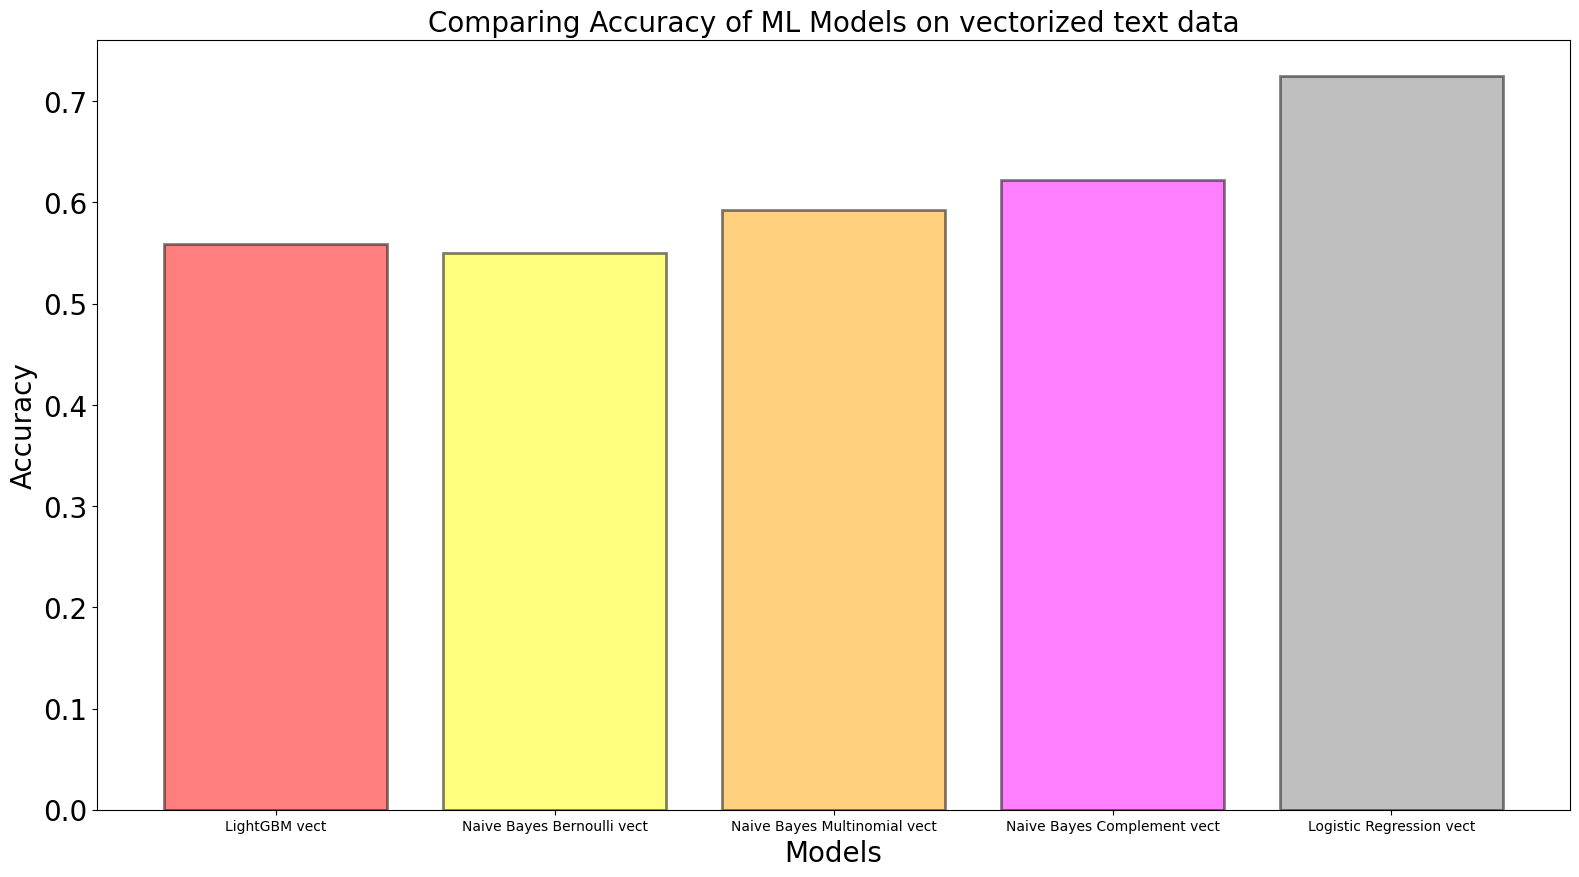

In [144]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(19,10))
plt.title('Comparing Accuracy of ML Models on vectorized text data',fontsize=20)
colors=['red','yellow','orange','magenta', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_vect.keys(),labels_vect.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



# COMPARE NUMERIC AND TF-IDF TEXT RESULTS

In [145]:
print("LightGBM accuracy score :", accuracy_LightGBM)
print("Naive Bayes Bernoulli accuracy score :", accuracyNB_Bernoulli)
print("Naive Bayes Multinomial accuracy score :", accuracyNB_Multinomial)
print("Naive Bayes Complement accuracy score :", accuracyNB_Complement)
print("Naive Bayes Gaussian accuracy score :", accuracyNB_Gaussian)
print("KNN accuracy score :", accuracy_knn)
print("SVM accuracy score :", accuracy_SVM)
print("Logistic Regression accuracy score :", accuracy_logReg)

LightGBM accuracy score : 0.6993709952383752
Naive Bayes Bernoulli accuracy score : 0.7734995003233202
Naive Bayes Multinomial accuracy score : 0.3325495267767915
Naive Bayes Complement accuracy score : 0.3272000470283934
Naive Bayes Gaussian accuracy score : 0.43007465757451063
KNN accuracy score : 0.927341132208571
SVM accuracy score : 0.8691434953853389
Logistic Regression accuracy score : 0.9448592087472811


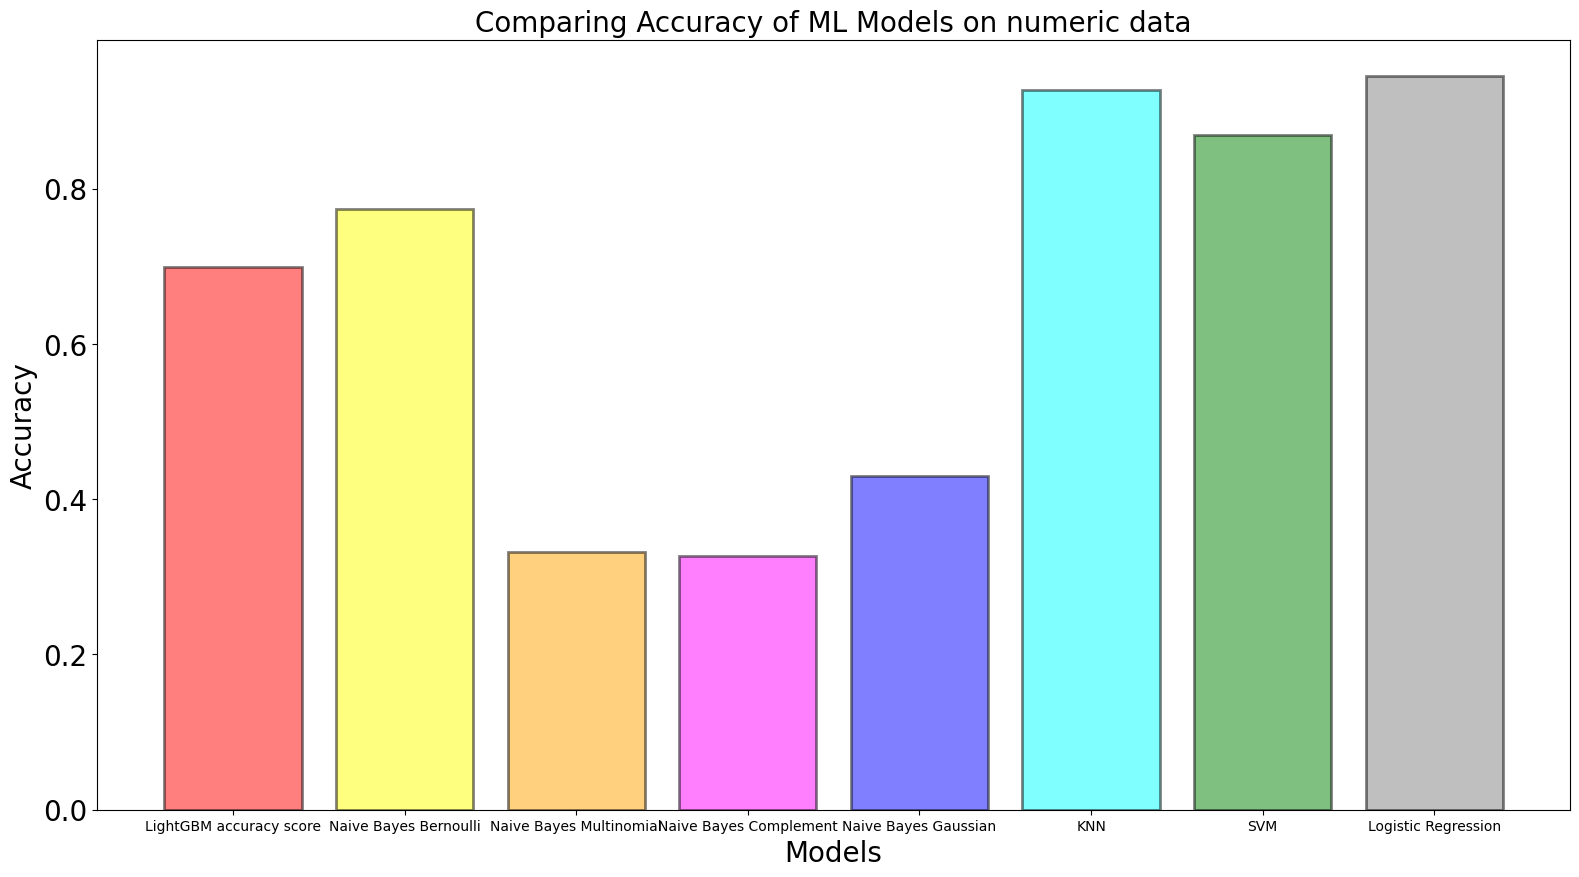

In [146]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(19,10))
plt.title('Comparing Accuracy of ML Models on numeric data',fontsize=20)
colors=['red','yellow','orange','magenta', 'blue', 'cyan', 'green', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels.keys(),labels.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



In [147]:
###### RESULTS FROM TEXT DATA
print("Results from text data\n")
print("LightGBM vect accuracy score :", accuracy_LightGBM_vect)
print("Naive Bayes Bernoulli vect accuracy score :", accuracyNB_Bernoulli_vect)
print("Naive Bayes Multinomial vect accuracy score :", accuracyNB_Multinomial_vect)
print("Naive Bayes Complement vect accuracy score :", accuracyNB_Complement_vect)
# print("KNN vect accuracy score :", accuracy_knn_vect)
# print("SVM vect accuracy score :", accuracy_SVM_vect)
print("Logistic Regression vect accuracy score :", accuracy_logReg_vect)


Results from text data

LightGBM vect accuracy score : 0.5588148844865087
Naive Bayes Bernoulli vect accuracy score : 0.549820704250191
Naive Bayes Multinomial vect accuracy score : 0.5930280406795603
Naive Bayes Complement vect accuracy score : 0.6222444300746576
Logistic Regression vect accuracy score : 0.724589971195109


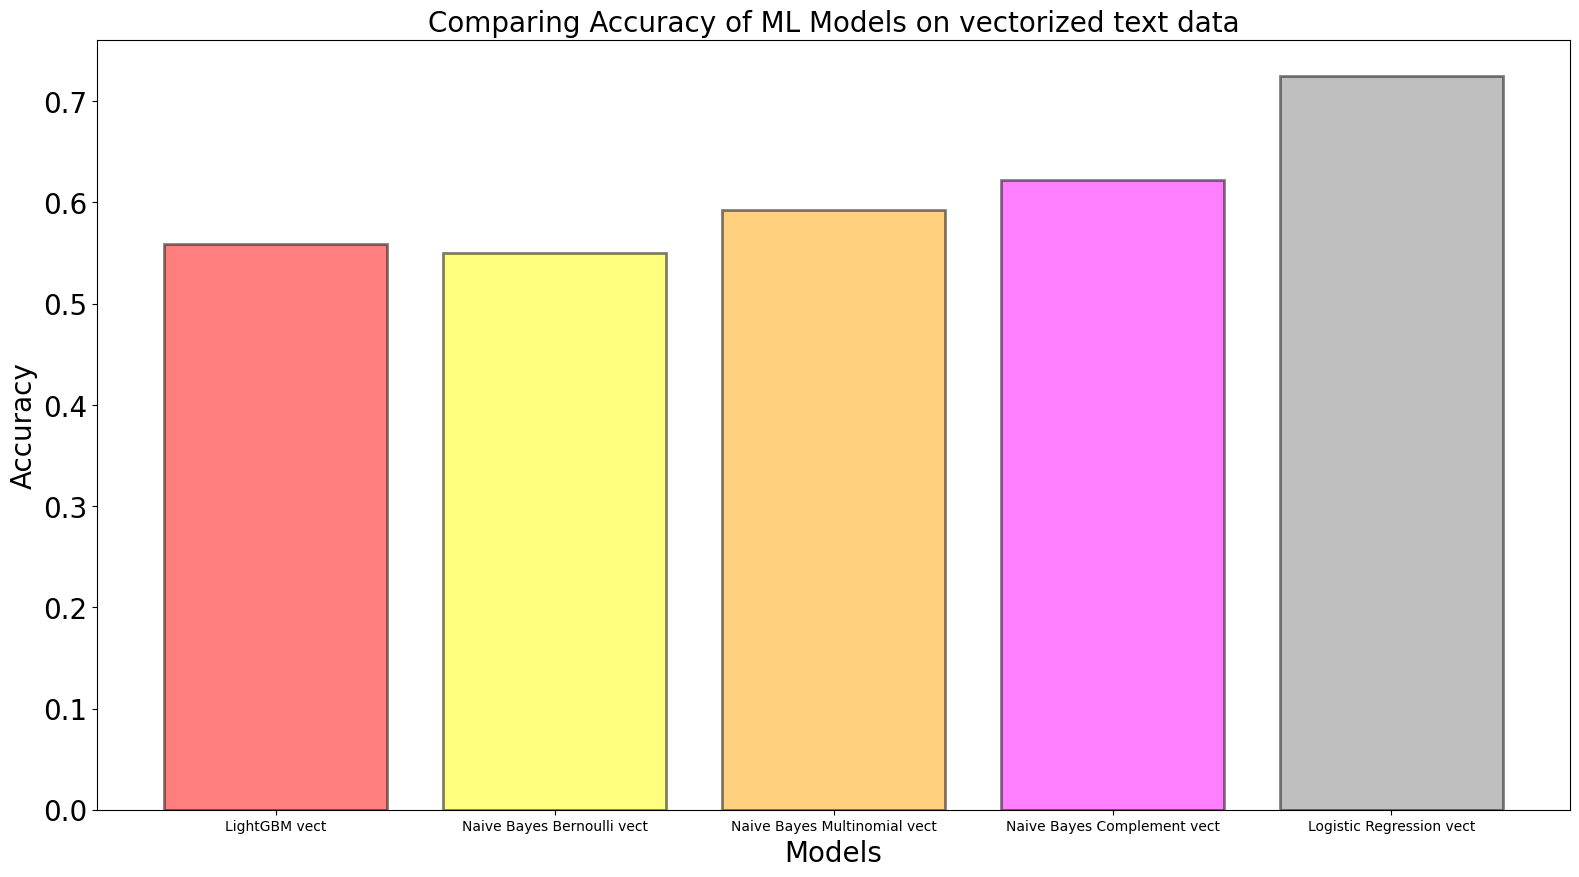

In [148]:
#Plotting accuracy of all the models with Bar-Graphs
plt.figure(figsize=(19,10))
plt.title('Comparing Accuracy of ML Models on vectorized text data',fontsize=20)
colors=['red','yellow','orange','magenta', 'gray']
plt.xticks(fontsize=10,color='black')
plt.yticks(fontsize=20,color='black')
plt.ylabel('Accuracy',fontsize=20)
plt.xlabel('Models',fontsize=20)
plt.bar(labels_vect.keys(),labels_vect.values(),edgecolor='black',color=colors, linewidth=2,alpha=0.5);



In [149]:
# Results from both data

print("Results from both data in comparison\n")

print("LightGBM accuracy score :", accuracy_LightGBM)
print("LightGBM vect accuracy score :", accuracy_LightGBM_vect, "\n")

print("Naive Bayes Bernoulli accuracy score :", accuracyNB_Bernoulli)
print("Naive Bayes Bernoulli vect accuracy score :", accuracyNB_Bernoulli_vect, "\n")

print("Naive Bayes Multinomial accuracy score :", accuracyNB_Multinomial)
print("Naive Bayes Multinomial vect accuracy score :", accuracyNB_Multinomial_vect, "\n")

print("Naive Bayes Complement accuracy score :", accuracyNB_Complement)
print("Naive Bayes Complement vect accuracy score :", accuracyNB_Complement_vect, "\n")

print("KNN accuracy score :", accuracy_knn, "\n")
# print("KNN vect accuracy score :", accuracy_knn_vect) # super schlecht!

print("SVM accuracy score :", accuracy_SVM, "\n")
# print("SVM vect accuracy score :", accuracy_SVM_vect) # super schlecht!

print("Logistic Regression accuracy score :", accuracy_logReg)
print("Logistic Regression vect accuracy score :", accuracy_logReg_vect)


Results from both data in comparison

LightGBM accuracy score : 0.6993709952383752
LightGBM vect accuracy score : 0.5588148844865087 

Naive Bayes Bernoulli accuracy score : 0.7734995003233202
Naive Bayes Bernoulli vect accuracy score : 0.549820704250191 

Naive Bayes Multinomial accuracy score : 0.3325495267767915
Naive Bayes Multinomial vect accuracy score : 0.5930280406795603 

Naive Bayes Complement accuracy score : 0.3272000470283934
Naive Bayes Complement vect accuracy score : 0.6222444300746576 

KNN accuracy score : 0.927341132208571 

SVM accuracy score : 0.8691434953853389 

Logistic Regression accuracy score : 0.9448592087472811
Logistic Regression vect accuracy score : 0.724589971195109
